## 1. Импорт необходимых библиотек для загрузки данных и работы с ними

- Numpy: для работы с данными, их очистки, форматирования нужным образом и удаления неактуальных данных.
- Polars: для чтения csv-файлов набора данных. (альтернатива pandas)
- Matplotlib: для построения графиков и отображения изображений в консоли colab вместе с seaborn.
- Opencv и PIL: для работы с изображениями, изменения их размера, форматирования для модели и прочего.

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
plt.style.use('ggplot')


## 2. Загрузка датасета с лицами

### * Скачивание датасета для гугл колаба

In [ ]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification --force
!unzip adience-benchmark-gender-and-age-classification.zip


### Загрузка датасета в DataFrame

In [ ]:
data_dir = ""  # папка где лежит датасет

# загрузка данных
fold0 = pl.read_csv(data_dir +
    "AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt", separator="\t")
fold1 = pl.read_csv(data_dir +
    "AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt", separator="\t")
fold2 = pl.read_csv(data_dir +
    "AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt", separator="\t")
fold3 = pl.read_csv(data_dir +
    "AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt", separator="\t")
fold4 = pl.read_csv(data_dir + "AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt", separator = "\t")


In [ ]:
# соединяем фолды в один DataFrame
total_data = pl.concat([fold0, fold1, fold2, fold3, fold4])

print(total_data.shape)

total_data.describe()


(19370, 12)


describe,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64
"""count""","""19370""","""19370""",19370.0,"""19370""","""18591""",19370.0,19370.0,19370.0,19370.0,19370.0,19370.0,19370.0
"""null_count""","""0""","""0""",0.0,"""0""","""779""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,1023.858906,null,null,949.670212,675.65937,633.042437,629.692463,-12.405111,3.128549,72.266598
"""std""",null,null,645.385251,null,null,667.06015,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
"""min""","""100003415@N08""","""10009111604_04…",1.0,"""(0, 2)""","""f""",0.0,0.0,80.0,80.0,-205.0,-45.0,5.0
"""25%""",null,null,486.0,null,null,441.0,333.0,324.0,325.0,-80.0,0.0,42.0
"""50%""",null,null,980.0,null,null,852.0,653.0,517.0,517.0,-5.0,0.0,70.0
"""75%""",null,null,1526.0,null,null,1359.0,964.0,778.0,778.0,5.0,0.0,98.0
"""max""","""9965452@N08""","""9999085413_662…",2284.0,"""None""","""u""",10024.0,2752.0,3264.0,3225.0,365.0,45.0,221.0


In [ ]:
# 5 рандомных записей из датасета
total_data.sample(5)


user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64
"""10148140@N07""","""9489576238_255…",1957,"""(15, 20)""","""f""",305,116,163,165,10,0,59
"""100346410@N05""","""11854611285_8a…",2067,"""(38, 43)""","""m""",1051,610,383,382,0,0,48
"""114841417@N06""","""12101038944_00…",491,"""45""","""m""",599,216,612,612,0,0,29
"""20254529@N04""","""9934610055_274…",68,"""(38, 43)""","""m""",0,336,344,413,5,-15,25
"""11008464@N06""","""9495805618_4f5…",970,"""(0, 2)""","""f""",0,31,2017,2295,10,0,138


shape: (3, 2)
┌────────┬───────┐
│ gender ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ f      ┆ 9372  │
│ u      ┆ 1099  │
│ m      ┆ 8120  │
└────────┴───────┘


Text(0, 0.5, 'Кол-во записей')

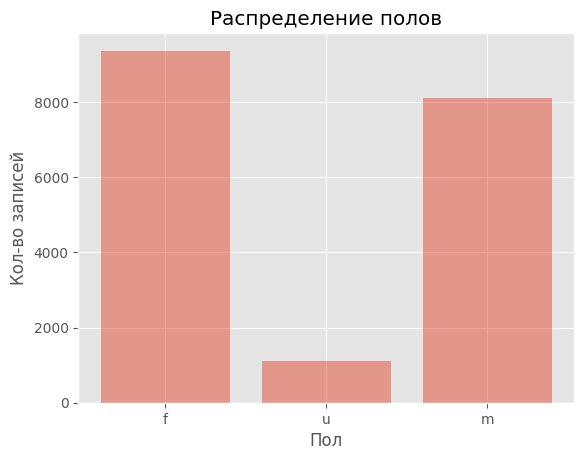

In [ ]:
# Получаем подсчет значений для колонки "gender"
gender_counts = total_data["gender"].value_counts().drop_nulls()
print(gender_counts)
# Строим график
plt.bar(gender_counts["gender"], gender_counts["count"], align='center', alpha=0.5)
plt.title("Распределение полов")
plt.xlabel("Пол")
plt.ylabel("Кол-во записей")


Выходит, что датасет состоит из 9372 фото женщин, 8120 фото мужчин и 1099  фотографи, где пол неизвестен (эти фотографии придется удалить, чтобы свести задачу модели к бинарной класификации)

Text(0.5, 0, 'Кол-во записей')

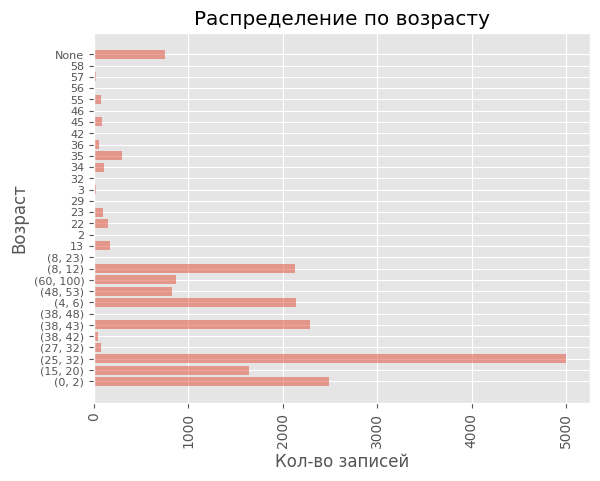

In [ ]:
# Получаем подсчет значений для колонки "age"
age_counts = total_data["age"].value_counts().drop_nulls().sort("age")

# Строим график
plt.barh(age_counts["age"], age_counts["count"],
        align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.title("Распределение по возрасту")
plt.ylabel("Возраст")
plt.xlabel("Кол-во записей")


Видно, что данные о возрасте имеет разный формат и даже повторяются (также есть фотографии без данных о возрасте). Далее нужно будет привести эти признаки к единому виду, так как это будет целевой переменной для модели

## 3. Приводим данные к нужным значениям


Выбираем только нужные столбцы => целевые переменные для моделей (age и gender) + динамически формируем путь к картинке из датасета

In [ ]:

imp_data = total_data[['age', 'gender']].clone()

img_path = []
for row in total_data.iter_rows(named=True):
    path = data_dir + "AdienceBenchmarkGenderAndAgeClassification/faces/" + row["user_id"] + "/coarse_tilt_aligned_face." + str(row["face_id"])+"."+row["original_image"]
    img_path.append(path)

imp_data = imp_data.with_columns(pl.Series("img_path", img_path))
print(imp_data.sample(3))


shape: (3, 3)
┌──────────┬────────┬───────────────────────────────────┐
│ age      ┆ gender ┆ img_path                          │
│ ---      ┆ ---    ┆ ---                               │
│ str      ┆ str    ┆ str                               │
╞══════════╪════════╪═══════════════════════════════════╡
│ (38, 43) ┆ m      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ (0, 2)   ┆ m      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ None     ┆ null   ┆ AdienceBenchmarkGenderAndAgeClas… │
└──────────┴────────┴───────────────────────────────────┘


Так как возраст имеет разные и неупорядоченные значения, нужно привести к единому виду. \
Создаем словарь, по которому меняем значения из датасета на нужные нам классы возрастов. Модель для предсказания возраста будет решать задачу класификации, а не линейной регрессии, так она должна быть точнее, нежели модель, которая будет предсказывать точный возраст. \
age_mapping = {"значения из датасета": "один из выбранных классов, ... }
- ['0-2']
- ['4-7']
- ['8-14']
- ['15-20']
- ['25-32']
- ['38-43']
- ['48-63']
- ['60+']

In [ ]:
age_mapping_dict = {'(0, 2)': '0-2',
                    '2': '0-2',
                    '3': '0-2',
                    '(4, 6)': '4-6',
                    '(8, 12)': '8-13',
                    '13': '8-13',
                    '22': '15-20',
                    '(8, 23)': '15-20',
                    '23': '25-32',
                    '(15, 20)': '15-20',
                    '(25, 32)': '25-32',
                    '(27, 32)': '25-32',
                    '32': '25-32',
                    '34': '25-32',
                    '29': '25-32',
                    '(38, 42)': '38-43',
                    '35': '38-43',
                    '36': '38-43',
                    '42': '48-53',
                    '45': '38-43',
                    '(38, 43)': '38-43',
                    '(38, 48)': '48-53',
                    '46': '48-53',
                    '(48, 53)': '48-53',
                    '55': '48-53',
                    '56': '48-53',
                    '(60, 100)': '60+',
                    '57': '60+',
                    '58': '60+'}

# Создаем функцию для маппинга возраста
def map_age(age):
    if age == 'None':
        return None
    return age_mapping_dict[age]


# Применяем маппинг и фильтрацию
imp_data = imp_data.with_columns([
    pl.col('age').map_elements(map_age).alias('age')

]).filter(

    pl.col('age').is_not_null()
)


In [ ]:
# Подсчет значений в столбце age
age_counts = imp_data["age"].value_counts(sort=True)

print(age_counts)
print(age_counts["count"].sum())


shape: (8, 2)
┌───────┬───────┐
│ age   ┆ count │
│ ---   ┆ ---   │
│ str   ┆ u32   │
╞═══════╪═══════╡
│ 25-32 ┆ 5296  │
│ 38-43 ┆ 2776  │
│ 0-2   ┆ 2509  │
│ 8-13  ┆ 2292  │
│ 4-6   ┆ 2140  │
│ 15-20 ┆ 1792  │
│ 48-53 ┆ 916   │
│ 60+   ┆ 901   │
└───────┴───────┘
18622


Отбросываем записи, которые не имеют известного пола, поскольку мы не сможем использовать их для обучения нашей модели.

In [ ]:
# Удаление строк с отсутствующими значениями
imp_data = imp_data.drop_nulls()

# Фильтрация данных, исключая строки, где gender равно 'u'
clean_data = imp_data.filter(pl.col("gender") != "u")

gender_counts = clean_data["gender"].value_counts(sort=True)
print(gender_counts)
print(gender_counts["count"].sum())

# Вывод информации о DataFrame
print(clean_data.sample(3))


shape: (2, 2)
┌────────┬───────┐
│ gender ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ f      ┆ 9332  │
│ m      ┆ 8120  │
└────────┴───────┘
17452
shape: (3, 3)
┌───────┬────────┬───────────────────────────────────┐
│ age   ┆ gender ┆ img_path                          │
│ ---   ┆ ---    ┆ ---                               │
│ str   ┆ str    ┆ str                               │
╞═══════╪════════╪═══════════════════════════════════╡
│ 38-43 ┆ f      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 4-6   ┆ f      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 25-32 ┆ m      ┆ AdienceBenchmarkGenderAndAgeClas… │
└───────┴────────┴───────────────────────────────────┘


Меняем метки пола на 0 и 1 - более понятный вид для модели, где 0 - это женщина, 1 - мужчина

In [ ]:
clean_data = clean_data.with_columns(
    gender=pl.when(pl.col('gender') == 'f').then(0)
    .otherwise(1)
)

print(clean_data.sample(5))


shape: (5, 3)
┌───────┬────────┬───────────────────────────────────┐
│ age   ┆ gender ┆ img_path                          │
│ ---   ┆ ---    ┆ ---                               │
│ str   ┆ i32    ┆ str                               │
╞═══════╪════════╪═══════════════════════════════════╡
│ 25-32 ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 38-43 ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 4-6   ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 25-32 ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 8-13  ┆ 1      ┆ AdienceBenchmarkGenderAndAgeClas… │
└───────┴────────┴───────────────────────────────────┘


Меняем также метки возраста на 0-7 (это будут метки класса целевой переменной для модели)

In [ ]:
clean_data = clean_data.with_columns(
    pl.when(pl.col('age') == '0-2').then(0)
      .when(pl.col('age') == '4-6').then(1)
      .when(pl.col('age') == '8-13').then(2)
      .when(pl.col('age') == '15-20').then(3)
      .when(pl.col('age') == '25-32').then(4)
      .when(pl.col('age') == '38-43').then(5)
      .when(pl.col('age') == '48-53').then(6)
      .when(pl.col('age') == '60+').then(7)
      .alias('age')
)

print(clean_data.sample(5))


shape: (5, 3)
┌─────┬────────┬───────────────────────────────────┐
│ age ┆ gender ┆ img_path                          │
│ --- ┆ ---    ┆ ---                               │
│ i32 ┆ i32    ┆ str                               │
╞═════╪════════╪═══════════════════════════════════╡
│ 4   ┆ 1      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 5   ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 1   ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 2   ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
│ 3   ┆ 0      ┆ AdienceBenchmarkGenderAndAgeClas… │
└─────┴────────┴───────────────────────────────────┘


## 4. Импорт модулей для создания самой модели

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization, Input, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## 5. Создание тренировочного и тестового набора данных гендерной модели

Для гендерной модели изменяю размер изображений до 128х128, потом преобразую их в массив numpy и добавляю в тестовый и обучающий наборы данных. Я сохраняю numpy массивы в файлы, так как преобразование 18к картинок занимает на моем ПК много времени.

In [ ]:
# Можно пропустить предыдущие шаги, если уже сохранены обработанные данные
clean_data = pl.read_csv("clean_data.csv")


In [ ]:
clean_data


age,gender,img_path
i32,i32,str
4,0,"""AdienceBenchma…"
4,1,"""AdienceBenchma…"
4,0,"""AdienceBenchma…"
4,1,"""AdienceBenchma…"
4,1,"""AdienceBenchma…"
4,0,"""AdienceBenchma…"
5,0,"""AdienceBenchma…"
4,0,"""AdienceBenchma…"
4,0,"""AdienceBenchma…"


In [ ]:
from sklearn.model_selection import train_test_split
import os
X = clean_data['img_path']
y = clean_data['gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f'Train data shape {X_train.shape}')
print(f'Test data shape {X_test.shape}')

train_images = []
test_images = []
i = 0
if os.path.exists('dataset_arrays/train_images.npy'):
    train_images = np.load('dataset_arrays/train_images.npy')
else:
    for img_path in X_train:
        image = Image.open(img_path.replace("D:/datasets/", ""))
        image = image.resize((128, 128))   # Resize the image
        data = np.asarray(image)
        train_images.append(data)
        i+= 1
        if i % 1000 == 0:
            print(f"-{i} images processed (train)")
    train_images = np.asarray(train_images)

print(f'Train images shape {train_images.shape}')

if os.path.exists('dataset_arrays/test_images.npy'):
    test_images = np.load('dataset_arrays/test_images.npy')
else:
    for img_path in X_test:
        image = Image.open(img_path.replace("D:/datasets/", ""))
        image = image.resize((128, 128))  # Resize the image
        data = np.asarray(image)
        test_images.append(data)
        i += 1
        if i % 1000 == 0:
            print(f"-{i} images processed (test)")
    test_images = np.asarray(test_images)

print(f'Test images shape {test_images.shape}')


Train data shape (12216,)
Test data shape (5236,)
-1000 images processed (train)
-2000 images processed (train)
-3000 images processed (train)
-4000 images processed (train)
-5000 images processed (train)
-6000 images processed (train)
-7000 images processed (train)
-8000 images processed (train)
-9000 images processed (train)
-10000 images processed (train)
-11000 images processed (train)
-12000 images processed (train)
Train images shape (12216, 128, 128, 3)
-13000 images processed (test)
-14000 images processed (test)
-15000 images processed (test)
-16000 images processed (test)
-17000 images processed (test)
Test images shape (5236, 128, 128, 3)


In [ ]:
print(y_train.shape)
train_images.shape


(12216,)


(12216, 128, 128, 3)

## 6. Модель для предсказания гендера


Основные изменения и улучшения:

Использование BatchNormalization вместо LayerNormalization для лучшей стабилизации обучения.
Добавление большего количества сверточных слоев с постепенным увеличением количества фильтров.
Использование padding='same' для сохранения пространственных размеров в сверточных слоях.
Более глубокая архитектура с четырьмя блоками свертки-пулинга.
Добавление дополнительных полносвязных слоев с dropout для предотвращения переобучения.
Использование меньшего размера ядра (3x3) в сверточных слоях, что является более распространенной практикой в современных CNN.

Модель сверточной нейронной сети (CNN) для классификации изображений по гендеру
1. Входные данные:
   - Принимает изображения размером 128x128 пикселей с 3 цветовыми каналами (RGB).
2. Сверточные блоки:
   - Модель содержит 4 сверточных блока, каждый из которых увеличивает количество фильтров (32 -> 64 -> 128 -> 256).
   - Каждый блок состоит из двух сверточных слоев (Conv2D) с ядром 3х3, за которыми следуют BatchNormalization, MaxPooling2D и Dropout.
   - Использование 'padding='same'' сохраняет пространственные размеры после свертки.
3. Полносвязные слои:
   - Flatten преобразует многомерный тензор в одномерный вектор для подачи в полносвязные слои.
   - После сверточных блоков идут полносвязные слои (Dense).
   - Два скрытых слоя (512 и 256 нейронов) с активацией ReLU.
   - Выходной слой с 2 нейронами и активацией softmax для бинарной классификации (мужской/женский).
4. Регуляризация:
   - Использование BatchNormalization для стабилизации обучения. Нормализует выходы предыдущего слоя, центрируя и масштабируя их.
   - Dropout для предотвращения переобучения. Случайно отключает определенный процент нейронов во время обучения, что помогает предотвратить переобучение.

In [ ]:
gender_model = Sequential([
    Input(shape=(128, 128, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

gender_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_11 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                      

В итоге получаем 9_696_674 весов. Я пробовал и другие архитектуры для этой модели, но такая показала себя лучше всего

In [ ]:
# преобразование датасета в удобный для tensorflow формат. В гугл колабе это увеливает скорость обучения
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_images, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Тренировка гендерной модели
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)  # функция для остановки, если loss не улучшается на протяжении 5 эпох

gender_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

gender_model_history = gender_model.fit(train_dataset, epochs=30, validation_data=test_dataset, callbacks=[callback])

gender_model.save("gender_model.h5")


Epoch 1/30
382/382 [==============================] - 41s 93ms/step - loss: 0.7070 - accuracy: 0.6293 - val_loss: 0.5733 - val_accuracy: 0.7003
Epoch 2/30
382/382 [==============================] - 35s 92ms/step - loss: 0.5432 - accuracy: 0.7189 - val_loss: 0.4414 - val_accuracy: 0.7840
Epoch 3/30
382/382 [==============================] - 35s 93ms/step - loss: 0.4665 - accuracy: 0.7736 - val_loss: 0.3958 - val_accuracy: 0.8201
Epoch 4/30
382/382 [==============================] - 35s 92ms/step - loss: 0.4180 - accuracy: 0.8010 - val_loss: 0.4569 - val_accuracy: 0.7888
Epoch 5/30
382/382 [==============================] - 36s 93ms/step - loss: 0.3762 - accuracy: 0.8243 - val_loss: 0.3603 - val_accuracy: 0.8384
Epoch 6/30
382/382 [==============================] - 36s 95ms/step - loss: 0.3562 - accuracy: 0.8381 - val_loss: 0.3747 - val_accuracy: 0.8337
Epoch 7/30
382/382 [==============================] - 35s 92ms/step - loss: 0.3248 - accuracy: 0.8559 - val_loss: 0.3466 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


После тренировки нейросети рисуем график истории ее обучения

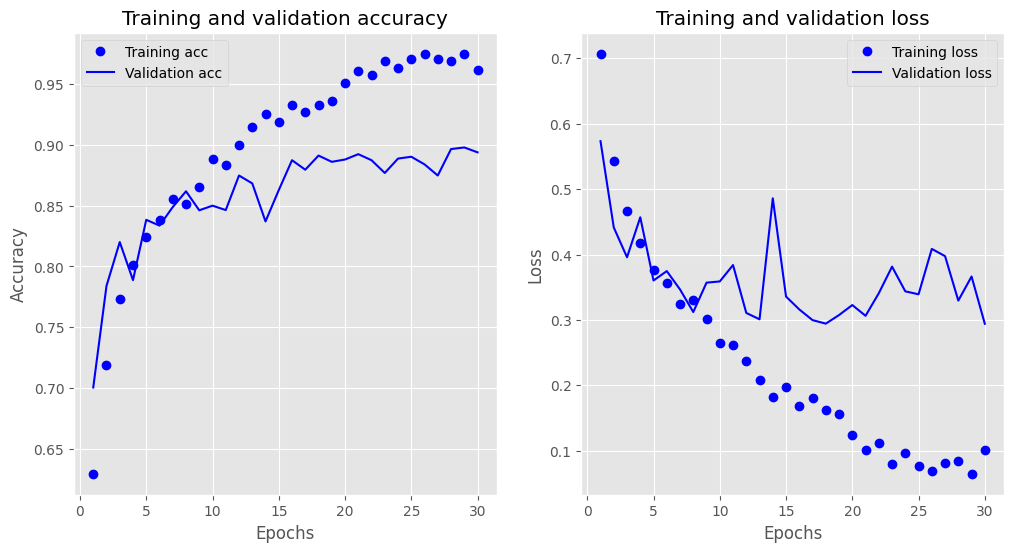

In [ ]:
history = gender_model_history
# Получаем данные обучения из history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Строим график точности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Строим график потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


*для гугл колаба, сохраняем модель в гугл диск, чтобы не потерять ее из-за окончания сессии

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
gender_model.save('/content/drive/MyDrive/gender_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 7. Создание тренировочного и тестового набора данных возратсной модели


In [4]:
# Можно пропустить предыдущие шаги, если уже сохранены обработанные данные
clean_data = pl.read_csv("./dataset_arrays/clean_data.csv")
clean_data


age,gender,x,y,dx,dy,img_path
i64,i64,i64,i64,i64,i64,str
4,0,0,414,1086,1383,"""D:/datasets/AdienceBenchmarkGe…"
4,1,301,105,640,641,"""D:/datasets/AdienceBenchmarkGe…"
4,0,2395,876,771,771,"""D:/datasets/AdienceBenchmarkGe…"
4,1,752,1255,484,485,"""D:/datasets/AdienceBenchmarkGe…"
4,1,175,80,769,768,"""D:/datasets/AdienceBenchmarkGe…"
…,…,…,…,…,…,…
4,0,718,748,492,492,"""D:/datasets/AdienceBenchmarkGe…"
4,1,48,472,768,768,"""D:/datasets/AdienceBenchmarkGe…"
4,0,950,0,692,687,"""D:/datasets/AdienceBenchmarkGe…"


In [5]:
from sklearn.model_selection import train_test_split
import os
X = clean_data['img_path']
y = clean_data['age']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f'Train data shape {X_train.shape}')
print(f'Test data shape {X_test.shape}')

train_images = []
test_images = []
i = 0
if os.path.exists('dataset_arrays/train_images.npy'):
    train_images = np.load('dataset_arrays/train_images.npy')
else:
    for img_path in X_train:
        image = Image.open(img_path)
        image = image.resize((128, 128))   # Resize the image
        data = np.asarray(image)
        train_images.append(data)
        i += 1
        if i % 1000 == 0:
            print(f"-{i} images processed (train)")
    train_images = np.asarray(train_images)

print(f'Train images shape {train_images.shape}')

if os.path.exists('dataset_arrays/test_images.npy'):
    test_images = np.load('dataset_arrays/test_images.npy')
else:
    for img_path in X_test:
        image = Image.open(img_path)
        image = image.resize((128, 128))  # Resize the image
        data = np.asarray(image)
        test_images.append(data)
        i += 1
        if i % 1000 == 0:
            print(f"-{i} images processed (test)")
    test_images = np.asarray(test_images)

print(f'Test images shape {test_images.shape}')


Train data shape (12216,)
Test data shape (5236,)
Train images shape (12216, 128, 128, 3)
Test images shape (5236, 128, 128, 3)


In [6]:
# Предполагая, что y_train['age'] - это ваши метки
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=8)


In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, y_train_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_images, y_test_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)


## 8. Модель для предсказания возраста


### Модель №1 (вышла не очнь)


Модель представляет собой сверточную нейронную сеть (CNN) для классификации возраста по изображениям:
1. Входные данные:
   - Принимает изображения размером 128x128 пикселей с 3 цветовыми каналами (RGB).

2. Сверточные блоки:
   - Модель содержит 4 сверточных блока с увеличивающимся количеством фильтров (64 -> 128 -> 256 -> 512).
   - Каждый блок состоит из двух сверточных слоев (Conv2D), за которыми следуют BatchNormalization, MaxPooling2D (кроме последнего блока) и Dropout.
   - Использование 'padding='same'' сохраняет пространственные размеры после свертки.

3. Особенности сверточных слоев:
   - Начинаются с 64 фильтров и увеличиваются до 512, что позволяет извлекать более сложные и абстрактные признаки на глубоких уровнях сети.
   - Размер ядра (3,3) => эффективное извлечение локальных признаков.

4. Пулинг и регуляризация:
   - MaxPooling2D используется в первых трех блоках для уменьшения пространственных размеров.
   - В последнем блоке применяется GlobalAveragePooling2D, что значительно уменьшает количество параметров.
   - Dropout применяется после каждого блока (25% в сверточных, 50% в полносвязных слоях) для предотвращения переобучения.

5. Полносвязные слои:
   - После сверточных блоков идут два полносвязных слоя (Dense) с 512 и 256 нейронами.
   - Выходной слой имеет 8 нейронов, что предполагает классификацию на 8 возрастных групп.

6. Активации и нормализация:
   - ReLU используется во всех слоях, кроме выходного, для нелинейности.
   - BatchNormalization применяется после каждого сверточного и полносвязного слоя для стабилизации обучения.
   - Softmax на выходном слое для получения вероятностей принадлежности к каждой возрастной группе.

In [ ]:
age_model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

age_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_110 (B  (None, 128, 128, 64)      256       
 atchNormalization)                                              
                                                                 
 conv2d_104 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_111 (B  (None, 128, 128, 64)      256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                      

В итоге получаем 5_092_168  весов.

In [ ]:
# Тренировка модели предсказания возраста
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5) # функция для остановки, если accuracy не улучшается на протяжении 5 эпох
age_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_age = age_model.fit(train_dataset, epochs=50,
                    validation_data=test_dataset, callbacks=[callback])

age_model.save('age_model50.h5')


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(128, 128, 3)


После тренировки нейросети рисуем график истории ее обучения

In [ ]:
# Получаем данные обучения из history
acc = history_age.history['accuracy']
val_acc = history_age.history['val_accuracy']
loss = history_age.history['loss']
val_loss = history_age.history['val_loss']
epochs = range(1, len(acc) + 1)

# Строим график точности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Строим график потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
age_model.save('/content/drive/MyDrive/age_model50.h5')


### Модель №2


In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import SeparableConv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

base_model = EfficientNetB0(
    weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base model

age_model3 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

age_model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 4, 4, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [12]:
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

age_model3.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_age3 = age_model3.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=50,
    callbacks=[reduce_lr, early_stop]
)

age_model3.save('age_model3_50.h5')


Epoch 1/50
382/382 [==============================] - 103s 249ms/step - loss: 1.7391 - accuracy: 0.4243 - val_loss: 1.5811 - val_accuracy: 0.4626 - lr: 0.0010
Epoch 2/50
382/382 [==============================] - 92s 242ms/step - loss: 1.6502 - accuracy: 0.4299 - val_loss: 1.5501 - val_accuracy: 0.4542 - lr: 0.0010
Epoch 3/50
382/382 [==============================] - 93s 244ms/step - loss: 1.6250 - accuracy: 0.4378 - val_loss: 1.5412 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 4/50
382/382 [==============================] - 92s 242ms/step - loss: 1.6124 - accuracy: 0.4395 - val_loss: 1.5277 - val_accuracy: 0.4710 - lr: 0.0010
Epoch 5/50
382/382 [==============================] - 93s 243ms/step - loss: 1.6092 - accuracy: 0.4391 - val_loss: 1.5272 - val_accuracy: 0.4668 - lr: 0.0010
Epoch 6/50
382/382 [==============================] - 92s 240ms/step - loss: 1.6048 - accuracy: 0.4438 - val_loss: 1.5246 - val_accuracy: 0.4624 - lr: 0.0010
Epoch 7/50
382/382 [==============================]

KeyboardInterrupt: 

In [15]:
history = history_age3
# Получаем данные обучения из history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Строим график точности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Строим график потерь
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


NameError: name 'history_age3' is not defined

*для гугл колаба, сохраняем модель в гугл диск, чтобы не потерять ее из-за окончания сессии

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
age_model3.save('/content/drive/MyDrive/age_model3.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
